In [1]:
%load_ext autoreload
%autoreload 2


In [ ]:
!pip show pandas

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from autots import AutoTS
from build_pandas import build_pandas


In [3]:
location = "C"
version = "1"
start_fresh = True

In [4]:
x_train, train_targets, x_test = build_pandas(location)

1510110


,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
2930,2019-01-01 00:00:00,5.6,1.240,1153.599976,0.0,0.0,1153.599976,1.0,275.200012,0.0,...,-49.178001,0.0,278.500000,68.500000,18220.400391,2.5,1.1,2.2,-0.0,0.0
2931,2019-01-01 01:00:00,5.3,1.241,1090.599976,0.0,0.0,1090.599976,1.0,274.500000,0.0,...,-46.529999,0.0,278.100006,99.400002,13637.299805,3.5,1.2,3.3,-0.0,0.0
2932,2019-01-01 02:00:00,5.4,1.238,1026.599976,0.0,0.0,1026.599976,0.0,274.899994,0.0,...,-41.987999,0.0,278.299988,98.400002,12678.799805,3.9,1.8,3.4,-0.0,0.0
2933,2019-01-01 03:00:00,5.2,1.240,961.700012,0.0,0.0,961.700012,0.0,274.200012,0.0,...,-36.182999,0.2,277.899994,97.199997,8751.599609,4.1,2.0,3.5,-0.0,0.0
2934,2019-01-01 04:00:00,5.4,1.239,954.900024,0.0,0.0,954.900024,0.0,274.899994,0.0,...,-29.688000,0.2,277.200012,96.900002,4267.799805,5.5,4.5,3.0,-0.0,0.0


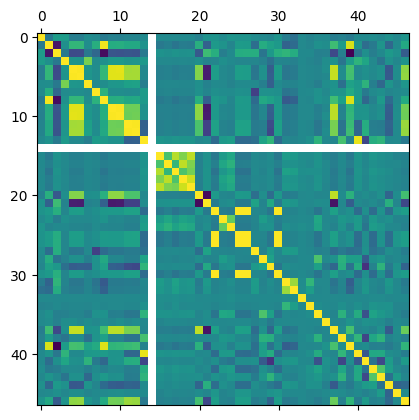

In [5]:
print(x_train.size)
plt.matshow(x_train.corr())
x_train.head()

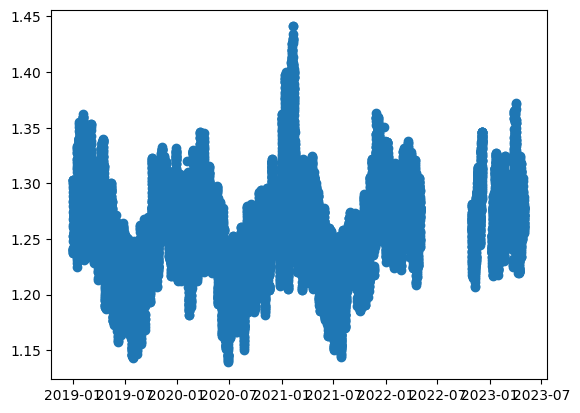

In [6]:
plt.scatter(x_train['date_forecast'], x_train['pv_measurement'])
plt.show()

In [7]:
stats = x_train.describe()
stats.loc['NaN'] = x_train.isna().sum()
stats

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
count,32130,32130.000000,32130.000000,32130.000000,3.213000e+04,32130.000000,32130.000000,32130.000000,32130.000000,32130.000000,...,32130.000000,32130.000000,32130.000000,32130.000000,32130.000000,32130.000000,32130.000000,32130.000000,32130.000000,32130.000000
mean,2020-11-20 04:16:18.039215,5.871992,1.255162,2051.333496,5.208732e+05,144.688828,1521.208252,-0.015966,274.809662,39.822296,...,-1.000573,0.060227,279.384521,72.957550,33355.550781,2.860171,0.678210,0.863144,0.000093,63.047551
min,2019-01-01 00:00:00,0.500000,1.139000,0.000000,0.000000e+00,0.000000,0.000000,-1.000000,247.300003,0.000000,...,-49.979000,0.000000,257.899994,0.000000,130.600006,0.000000,-6.400000,-8.800000,-0.100000,-0.000000
25%,2019-12-01 18:15:00,3.900000,1.230000,373.299988,0.000000e+00,0.000000,433.324989,0.000000,270.399994,0.000000,...,-18.159500,0.000000,274.899994,50.200001,16043.625000,1.600000,-1.000000,-0.400000,0.000000,0.000000
50%,2020-10-31 12:30:00,5.300000,1.255000,1249.850037,6.877300e+03,0.000000,1011.649994,0.000000,274.500000,0.000000,...,-0.849500,0.000000,278.500000,94.800003,38043.750000,2.500000,0.300000,1.000000,0.000000,0.000000
75%,2021-10-01 04:45:00,7.600000,1.279000,2668.300049,7.953364e+05,224.899994,1863.549957,0.000000,280.200012,66.900002,...,15.737000,0.100000,283.799988,100.000000,48901.725586,3.800000,2.200000,2.100000,0.000000,29.400000
max,2023-04-30 23:00:00,18.900000,1.441000,12431.299805,3.006697e+06,835.299988,11665.700195,1.000000,295.100006,340.100006,...,49.917999,1.400000,303.200012,100.000000,76737.796875,14.300000,11.300000,9.000000,0.100000,999.600000
std,NaN,2.737951,0.038115,2402.246338,8.237111e+05,229.398972,1745.513916,0.373697,7.023757,60.733841,...,23.983866,0.116016,6.543846,35.695637,18436.144531,1.648711,2.442375,1.931529,0.011913,152.480302
NaN,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


[[-1.82216659e-01  1.95759895e-01 -3.99924314e-02 ...  1.33415415e-01
  -1.48635846e-02 -2.32007131e-01]
 [ 1.52980211e-01 -2.52082917e-01  1.99991440e-02 ... -8.16024279e-04
  -2.34897668e-02 -1.50004213e-02]
 [-2.16121195e-01  3.66100488e-02  7.44958519e-02 ...  5.49678353e-02
  -5.26355874e-02  1.00144958e-01]
 ...
 [ 8.54733366e-04  1.87952945e-02 -4.96481416e-05 ... -8.52910948e-06
  -1.55597143e-05  2.48111497e-05]
 [ 1.40185232e-04  2.11598875e-03  2.06604404e-05 ... -2.54455765e-06
  -9.43331265e-06  8.20943825e-06]
 [ 0.00000000e+00  1.64690310e-16 -4.78445324e-17 ... -4.85722573e-17
  -2.77555756e-17  1.38777878e-16]]


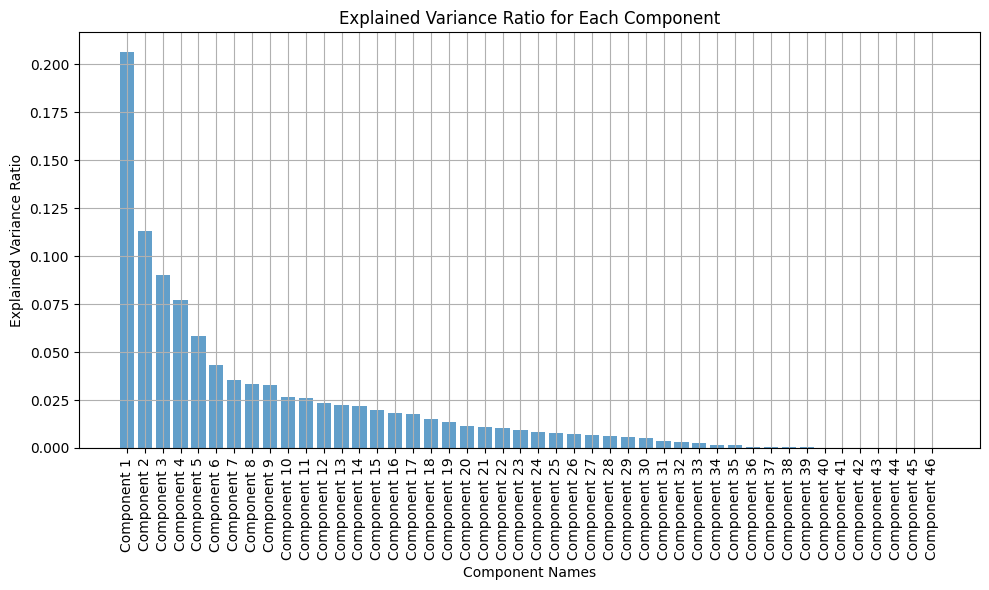

In [8]:
scaler = StandardScaler()
date_forecast = x_train['date_forecast']
x_train.drop(columns=['date_forecast'], inplace=True)
x_train_standardized = scaler.fit_transform(x_train)
comps = 15
pca = PCA()
pca.fit_transform(x_train_standardized)
explained_variance_ratio = pca.explained_variance_ratio_
principal_components = pca.components_
print(principal_components)
# Create a bar plot for explained variance ratios
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')

# Set custom labels for the x-axis based on PCA component order
num_components = len(explained_variance_ratio)
variable_names = [f'Component {i+1}' for i in range(num_components)]

plt.xticks(range(1, num_components + 1), variable_names, rotation=90)  # Use rotation for better readability

plt.xlabel('Component Names')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Component')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
x_train.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
2930,5.6,1.240,1153.599976,0.0,0.0,1153.599976,1.0,275.200012,0.0,0.0,...,-49.178001,0.0,278.500000,68.500000,18220.400391,2.5,1.1,2.2,-0.0,0.0
2931,5.3,1.241,1090.599976,0.0,0.0,1090.599976,1.0,274.500000,0.0,0.0,...,-46.529999,0.0,278.100006,99.400002,13637.299805,3.5,1.2,3.3,-0.0,0.0
2932,5.4,1.238,1026.599976,0.0,0.0,1026.599976,0.0,274.899994,0.0,0.0,...,-41.987999,0.0,278.299988,98.400002,12678.799805,3.9,1.8,3.4,-0.0,0.0
2933,5.2,1.240,961.700012,0.0,0.0,961.700012,0.0,274.200012,0.0,0.0,...,-36.182999,0.2,277.899994,97.199997,8751.599609,4.1,2.0,3.5,-0.0,0.0
2934,5.4,1.239,954.900024,0.0,0.0,954.900024,0.0,274.899994,0.0,0.0,...,-29.688000,0.2,277.200012,96.900002,4267.799805,5.5,4.5,3.0,-0.0,0.0


In [10]:
x_train['date_forecast'] = date_forecast

model = AutoTS(
    forecast_length=1600,
    frequency='infer',
    prediction_interval=0.95,
    ensemble=None,
    #models_mode='deep',
    model_list = 'superfast',# or ['ARIMA','ETS']
    max_generations=5 if start_fresh else 0,
    num_validations=2 if start_fresh else 0,
    no_negatives=True,
    n_jobs='12',
    validation_method="backwards"
)

if not start_fresh:
    model = model.import_template(f"template_{location}.csv", method='only') # method='add on'
model = model.fit(x_train, date_col='date_forecast', value_col='pv_measurement', result_file=f"result_{location}_{version}.csv")

Data frequency is: H, used frequency is: H
Model Number: 1 with model AverageValueNaive in generation 0 of 5
Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

Model Number: 4 with model GLS in generation 0 of 5
Model Number: 5 with model GLS in generation 0 of 5
Model Number: 6 with model LastValueNaive in generation 0 of 5
Model Number: 7 with model LastValueNaive in generation 0 of 5
Model Number: 8 with model LastValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use

Model Number: 9 with model LastValueNaive in generation 0 of 5
Model Number: 10 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 11 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()


Model Number: 12 with model SeasonalNaive in generation 0 of 5
Model Number: 13 with model ConstantNaive in generation 0 of 5
Model Number: 14 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 15 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 16 with model SeasonalityMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'nearest', 'transformations': {'0': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 16 in generation 0: SeasonalityMotif
Model Number: 17 with model ConstantNaive in generation 0 of 5
Model Number: 18 with model LastValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 19 with model AverageValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFram

Model Number: 20 with model GLS in generation 0 of 5
Model Number: 21 with model SeasonalNaive in generation 0 of 5
Model Number: 22 with model SeasonalityMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 23 with model GLS in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1442: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transfo

Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'pad', 'transformations': {'0': 'PctChangeTransformer', '1': 'LocalLinearTrend', '2': 'DifferencedTransformer', '3': 'Detrend', '4': 'RollingMeanTransformer', '5': 'RegressionFilter'}, 'transformation_params': {'0': {}, '1': {'rolling_window': 30, 'n_tails': 30, 'n_future': 0.05, 'method': 'mean', 'macro_micro': True}, '2': {}, '3': {'model': 'Linear', 'phi': 1, 'window': 10, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3}}}}, '4': {'fixed': True, 'window': 7}, '5': {'sigma': 0.5, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None}}}. fail_on_forecast_nan=True") i

c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or o

Model Number: 26 with model GLS in generation 0 of 5
Model Number: 27 with model ConstantNaive in generation 0 of 5
Model Number: 28 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1442: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:440: Future

Model Number: 29 with model GLS in generation 0 of 5
Model Number: 30 with model LastValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Model Number: 31 with model AverageValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated

Model Number: 32 with model ConstantNaive in generation 0 of 5
Model Number: 33 with model ConstantNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 34 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:440: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:453: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_2 = df.groupby(level=0, axis=0).median()


Model Number: 35 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:440: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).median()


Model Number: 36 with model GLS in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

Model Number: 37 with model SeasonalNaive in generation 0 of 5
Model Number: 38 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

Model Number: 39 with model LastValueNaive in generation 0 of 5
Model Number: 40 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use 

Model Number: 41 with model ConstantNaive in generation 0 of 5
Model Number: 42 with model ConstantNaive in generation 0 of 5
Model Number: 43 with model LastValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 44 with model LastValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 44 in generation 0: LastValueNaive
Model Number: 45 with model AverageValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1442: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated a

Model Number: 46 with model SeasonalityMotif in generation 0 of 5
New Generation: 1 of 5
Model Number: 47 with model LastValueNaive in generation 1 of 5
Model Number: 48 with model SeasonalNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 49 with model LastValueNaive in generation 1 of 5
Model Number: 50 with model AverageValueNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 51 with model GLS in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 52 with model AverageValueNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 53 with model AverageValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 53 in generation 1: AverageValueNaive
Model Number: 54 with model GLS in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 54 in generation 1: GLS
Model Number: 55 with model LastValueNaive in generation 1 of 5
Model Number: 56 with model SeasonalityMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: MemoryError((36344, 1600, 52), dtype('float64')) in model 56 in generation 1: SeasonalityMotif
Model Number: 57 with model SeasonalNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 58 with model AverageValueNaive in generation 1 of 5
Model Number: 59 with model AverageValueNaive in generation 1 of 5
Model Number: 60 with model ConstantNaive in generation 1 of 5
Model Number: 61 with model SeasonalNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'm

Model Number: 62 with model GLS in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 63 with model SeasonalNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a futu

Model Number: 64 with model GLS in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is 

Model Number: 65 with model SeasonalNaive in generation 1 of 5
Model Number: 66 with model LastValueNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 67 with model LastValueNaive in generation 1 of 5
Model Number: 68 with model SeasonalNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:440: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future v

Model Number: 69 with model LastValueNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 70 with model SeasonalNaive in generation 1 of 5
Model Number: 71 with model AverageValueNaive in generation 1 of 5
Model Number: 72 with model LastValueNaive in generation 1 of 5
Model Number: 73 with model LastValueNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

Model Number: 74 with model GLS in generation 1 of 5
Model Number: 75 with model AverageValueNaive in generation 1 of 5
Model Number: 76 with model SeasonalNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use ob

New Generation: 2 of 5
Model Number: 77 with model GLS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 78 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:440: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).median()


Model Number: 79 with model LastValueNaive in generation 2 of 5
Model Number: 80 with model GLS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 81 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()


Model Number: 82 with model LastValueNaive in generation 2 of 5
Model Number: 83 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 84 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()


Model Number: 85 with model GLS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Model Number: 86 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()


Model Number: 87 with model AverageValueNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:440: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be remov

Model Number: 88 with model AverageValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 88 in generation 2: AverageValueNaive
Model Number: 89 with model SeasonalNaive in generation 2 of 5
Model Number: 90 with model AverageValueNaive in generation 2 of 5
Model Number: 91 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()


Model Number: 92 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()


Model Number: 93 with model AverageValueNaive in generation 2 of 5
Model Number: 94 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 95 with model GLS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 96 with model LastValueNaive in generation 2 of 5
Model Number: 97 with model AverageValueNaive in generation 2 of 5
Model Number: 98 with model GLS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 98 in generation 2: GLS
Model Number: 99 with model LastValueNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 100 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()


Model Number: 101 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:440: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).median()


Model Number: 102 with model GLS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use ob

Model Number: 103 with model LastValueNaive in generation 2 of 5
Model Number: 104 with model AverageValueNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: 

Model Number: 105 with model SeasonalNaive in generation 2 of 5
Model Number: 106 with model GLS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


New Generation: 3 of 5
Model Number: 107 with model SeasonalNaive in generation 3 of 5
Model Number: 108 with model AverageValueNaive in generation 3 of 5
Model Number: 109 with model AverageValueNaive in generation 3 of 5
Model Number: 110 with model AverageValueNaive in generation 3 of 5
Model Number: 111 with model ConstantNaive in generation 3 of 5
Model Number: 112 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

Template Eval Error: MemoryError((36344, 36344, 52), dtype('float64')) in model 112 in generation 3: SeasonalNaive
Model Number: 113 with model LastValueNaive in generation 3 of 5
Model Number: 114 with model AverageValueNaive in generation 3 of 5
Model Number: 115 with model GLS in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

Model Number: 116 with model SeasonalityMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 117 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 118 with model LastValueNaive in generation 3 of 5
Model Number: 119 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use 

Model Number: 120 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 120 in generation 3: SeasonalNaive
Model Number: 121 with model GLS in generation 3 of 5
Template Eval Error: MemoryError((36344, 36344, 52), dtype('float64')) in model 121 in generation 3: GLS
Model Number: 122 with model ConstantNaive in generation 3 of 5
Template Eval Error: MemoryError((36344, 36344, 52), dtype('float64')) in model 122 in generation 3: ConstantNaive
Model Number: 123 with model LastValueNaive in generation 3 of 5
Model Number: 124 with model LastValueNaive in generation 3 of 5
Model Number: 125 with model GLS in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 126 with model GLS in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 127 with model AverageValueNaive in generation 3 of 5
Model Number: 128 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:440: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).median()


Model Number: 129 with model LastValueNaive in generation 3 of 5
Model Number: 130 with model AverageValueNaive in generation 3 of 5
Model Number: 131 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 132 with model GLS in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Model Number: 133 with model LastValueNaive in generation 3 of 5
Model Number: 134 with model LastValueNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill

Model Number: 135 with model AverageValueNaive in generation 3 of 5
Model Number: 136 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:2402: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - self.means.shift(self.lag).values[..., None]).fillna(


New Generation: 4 of 5
Model Number: 137 with model SeasonalityMotif in generation 4 of 5
Model Number: 138 with model LastValueNaive in generation 4 of 5
Model Number: 139 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 140 with model AverageValueNaive in generation 4 of 5
Model Number: 141 with model GLS in generation 4 of 5
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 141 in generation 4: GLS
Model Number: 142 with model AverageValueNaive in generation 4 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'AlignLastValue', '1': 'QuantileTransformer', '2': 'DifferencedTransformer', '3': 'Detrend'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.5, 'first_value_only': False}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {}, '3': {'model': 'Tweedie', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}}}. fail_on_forecast_nan=True") in model 142 in generation 4: AverageValueNaive
Model Number: 143 wit

c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() 

Model Number: 146 with model AverageValueNaive in generation 4 of 5
Model Number: 147 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_value

Model Number: 148 with model AverageValueNaive in generation 4 of 5
Model Number: 149 with model AverageValueNaive in generation 4 of 5
Model Number: 150 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

Model Number: 151 with model AverageValueNaive in generation 4 of 5
Model Number: 152 with model LastValueNaive in generation 4 of 5
Model Number: 153 with model GLS in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Model Number: 154 with model GLS in generation 4 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 154 in generation 4: GLS
Model Number: 155 with model GLS in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a futur

Model Number: 156 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 157 with model AverageValueNaive in generation 4 of 5
Model Number: 158 with model AverageValueNaive in generation 4 of 5
Model Number: 159 with model AverageValueNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 160 with model GLS in generation 4 of 5
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 160 in generation 4: GLS
Model Number: 161 with model AverageValueNaive in generation 4 of 5
Model Number: 162 with model GLS in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use 

Model Number: 163 with model AverageValueNaive in generation 4 of 5
Model Number: 164 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:440: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future 

Model Number: 165 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 166 with model LastValueNaive in generation 4 of 5
New Generation: 5 of 5
Model Number: 167 with model SeasonalNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprec

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 167 in generation 5: SeasonalNaive
Model Number: 168 with model GLS in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3876: FutureWarning: DataFrame.fillna with 'me

Model Number: 169 with model GLS in generation 5 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 169 in generation 5: GLS
Model Number: 170 with model SeasonalNaive in generation 5 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 170 in generation 5: SeasonalNaive
Model Number: 171 with model AverageValueNaive in generation 5 of 5
Model Number: 172 with model AverageValueNaive in generation 5 of 5
Model Number: 173 with model AverageValueNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: 

Model Number: 174 with model AverageValueNaive in generation 5 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 174 in generation 5: AverageValueNaive
Model Number: 175 with model GLS in generation 5 of 5
Model Number: 176 with model GLS in generation 5 of 5
Model Number: 177 with model GLS in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 178 with model AverageValueNaive in generation 5 of 5
Model Number: 179 with model GLS in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 180 with model LastValueNaive in generation 5 of 5
Model Number: 181 with model LastValueNaive in generation 5 of 5
Model Number: 182 with model LastValueNaive in generation 5 of 5
Model Number: 183 with model LastValueNaive in generation 5 of 5
Model Number: 184 with model AverageValueNaive in generation 5 of 5
Model Number: 185 with model AverageValueNaive in generation 5 of 5
Model Number: 186 with model AverageValueNaive in generation 5 of 5
Model Number: 187 with model SeasonalNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fil

Model Number: 188 with model AverageValueNaive in generation 5 of 5
Model Number: 189 with model SeasonalNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Template Eval Error: MemoryError((36344, 36344, 52), dtype('float64')) in model 189 in generation 5: SeasonalNaive
Model Number: 190 with model LastValueNaive in generation 5 of 5
TotalRuntime missing in 6!
Validation Round: 1
Model Number: 1 of 29 with model AverageValueNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Us

📈 1 - AverageValueNaive with avg smape 182.85: 
Model Number: 2 of 29 with model AverageValueNaive for Validation 1
📈 2 - AverageValueNaive with avg smape 179.14: 
Model Number: 3 of 29 with model AverageValueNaive for Validation 1
3 - AverageValueNaive with avg smape 182.85: 
Model Number: 4 of 29 with model SeasonalNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

4 - SeasonalNaive with avg smape 182.85: 
Model Number: 5 of 29 with model SeasonalNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


5 - SeasonalNaive with avg smape 182.85: 
Model Number: 6 of 29 with model GLS for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


6 - GLS with avg smape 182.85: 
Model Number: 7 of 29 with model AverageValueNaive for Validation 1
📈 7 - AverageValueNaive with avg smape 46.77: 
Model Number: 8 of 29 with model GLS for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use

8 - GLS with avg smape 195.83: 
Model Number: 9 of 29 with model AverageValueNaive for Validation 1
9 - AverageValueNaive with avg smape 183.52: 
Model Number: 10 of 29 with model AverageValueNaive for Validation 1
10 - AverageValueNaive with avg smape 176.67: 
Model Number: 11 of 29 with model GLS for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

11 - GLS with avg smape 194.36: 
Model Number: 12 of 29 with model SeasonalNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


12 - SeasonalNaive with avg smape 182.85: 
Model Number: 13 of 29 with model SeasonalNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


13 - SeasonalNaive with avg smape 46.77: 
Model Number: 14 of 29 with model SeasonalNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


14 - SeasonalNaive with avg smape 176.67: 
Model Number: 15 of 29 with model SeasonalNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


15 - SeasonalNaive with avg smape 176.67: 
Model Number: 16 of 29 with model LastValueNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

16 - LastValueNaive with avg smape 174.27: 
Model Number: 17 of 29 with model GLS for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


17 - GLS with avg smape 46.77: 
Model Number: 18 of 29 with model GLS for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

18 - GLS with avg smape 46.77: 
Model Number: 19 of 29 with model GLS for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


19 - GLS with avg smape 81.95: 
Model Number: 20 of 29 with model LastValueNaive for Validation 1
20 - LastValueNaive with avg smape 85.93: 
Model Number: 21 of 29 with model LastValueNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj

21 - LastValueNaive with avg smape 176.67: 
Model Number: 22 of 29 with model LastValueNaive for Validation 1
22 - LastValueNaive with avg smape 139.08: 
Model Number: 23 of 29 with model LastValueNaive for Validation 1
23 - LastValueNaive with avg smape 182.85: 
Model Number: 24 of 29 with model LastValueNaive for Validation 1
24 - LastValueNaive with avg smape 70.57: 
Model Number: 25 of 29 with model ConstantNaive for Validation 1
25 - ConstantNaive with avg smape 46.77: 
Model Number: 26 of 29 with model ConstantNaive for Validation 1
26 - ConstantNaive with avg smape 199.92: 
Model Number: 27 of 29 with model ConstantNaive for Validation 1
27 - ConstantNaive with avg smape 176.67: 
Model Number: 28 of 29 with model ConstantNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future 

28 - ConstantNaive with avg smape 199.91: 
Model Number: 29 of 29 with model ConstantNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

29 - ConstantNaive with avg smape 46.77: 
Validation Round: 2
Model Number: 1 of 29 with model AverageValueNaive for Validation 2
📈 1 - AverageValueNaive with avg smape 171.06: 
Model Number: 2 of 29 with model AverageValueNaive for Validation 2
📈 2 - AverageValueNaive with avg smape 166.33: 
Model Number: 3 of 29 with model AverageValueNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\evaluator\auto_model.py:1409: RuntimeWarning: Mean of empty slice
  scaler = np.nanmean(np.abs(np.diff(df_train[-100:], axis=0)), axis=0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\evaluator\auto_model.py:1410: RuntimeWarning: All-NaN slice encountered
  fill_val = np.nanmax(scaler)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: Data

3 - AverageValueNaive with avg smape 171.06: 
Model Number: 4 of 29 with model SeasonalNaive for Validation 2
4 - SeasonalNaive with avg smape 171.06: 
Model Number: 5 of 29 with model SeasonalNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


5 - SeasonalNaive with avg smape 171.06: 
Model Number: 6 of 29 with model GLS for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


6 - GLS with avg smape 171.06: 
Model Number: 7 of 29 with model AverageValueNaive for Validation 2
📈 7 - AverageValueNaive with avg smape 55.53: 
Model Number: 8 of 29 with model GLS for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use

8 - GLS with avg smape 55.53: 
Model Number: 9 of 29 with model AverageValueNaive for Validation 2
9 - AverageValueNaive with avg smape 184.04: 
Model Number: 10 of 29 with model AverageValueNaive for Validation 2
10 - AverageValueNaive with avg smape 55.53: 
Model Number: 11 of 29 with model GLS for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

11 - GLS with avg smape 55.53: 
Model Number: 12 of 29 with model SeasonalNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


12 - SeasonalNaive with avg smape 171.06: 
Model Number: 13 of 29 with model SeasonalNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


13 - SeasonalNaive with avg smape 55.53: 
Model Number: 14 of 29 with model SeasonalNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


14 - SeasonalNaive with avg smape 55.53: 
Model Number: 15 of 29 with model SeasonalNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


15 - SeasonalNaive with avg smape 55.53: 
Model Number: 16 of 29 with model LastValueNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

16 - LastValueNaive with avg smape 55.53: 
Model Number: 17 of 29 with model GLS for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


17 - GLS with avg smape 185.05: 
Model Number: 18 of 29 with model GLS for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

18 - GLS with avg smape 55.53: 
Model Number: 19 of 29 with model GLS for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


19 - GLS with avg smape 86.28: 
Model Number: 20 of 29 with model LastValueNaive for Validation 2
20 - LastValueNaive with avg smape 150.1: 
Model Number: 21 of 29 with model LastValueNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj

21 - LastValueNaive with avg smape 55.53: 
Model Number: 22 of 29 with model LastValueNaive for Validation 2
22 - LastValueNaive with avg smape 180.12: 
Model Number: 23 of 29 with model LastValueNaive for Validation 2
23 - LastValueNaive with avg smape 171.06: 
Model Number: 24 of 29 with model LastValueNaive for Validation 2
24 - LastValueNaive with avg smape 152.01: 
Model Number: 25 of 29 with model ConstantNaive for Validation 2
25 - ConstantNaive with avg smape 55.53: 
Model Number: 26 of 29 with model ConstantNaive for Validation 2
26 - ConstantNaive with avg smape 199.98: 
Model Number: 27 of 29 with model ConstantNaive for Validation 2
27 - ConstantNaive with avg smape 55.53: 
Model Number: 28 of 29 with model ConstantNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future 

28 - ConstantNaive with avg smape 199.98: 
Model Number: 29 of 29 with model ConstantNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

29 - ConstantNaive with avg smape 55.53: 
TotalRuntime missing in 7!
Validation Round: 1
TotalRuntime missing in 0!
Validation Round: 2
TotalRuntime missing in 0!


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

In [11]:
print(model)

Initiated AutoTS object with best model: 
AverageValueNaive
{'fillna': 'zero', 'transformations': {'0': 'ClipOutliers', '1': 'QuantileTransformer', '2': 'MaxAbsScaler'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {}}}
{'method': 'Weighted_Mean', 'window': None}
Validation: 0, 1, 2
SMAPE: 110.31096563011457, 46.766169154228855, 55.530973451327434
MAE: 88.92096563011457, 5.871467661691542, 8.968517699115045
SPL: 296.28469829036743, 24.514780210931512, 25.08393788286119


In [12]:
#results = model.results()[['Model', 'smape', 'mae', 'rmse', 'made', 'mage', 'mle']]
#results.sort_values('mae')

In [13]:
model.export_best_model(f'model_{location}_{version}.csv')

In [14]:
model.export_template(f'template_{location}_{version}.csv', n=20)

In [36]:
model.best_model_name = "SeasonalNaive"
model.best_model_params = {"method": "lastvalue", "lag_1": 7, "lag_2": 59}
model.best_model_transformation_params = {"fillna": "zero", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "MaxAbsScaler"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": None}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}


In [37]:
prediction = model.predict(verbose=1)

In [38]:
forecasts_df = prediction.forecast
initial_results = model.results()

In [39]:
forecasts_df.head()

,pv_measurement
2023-05-01 00:00:00,374.360000
2023-05-01 01:00:00,353.789712
2023-05-01 02:00:00,215.600000
2023-05-01 03:00:00,117.600000
2023-05-01 04:00:00,0.000000


In [40]:
forecasts_df.size

1600

<Axes: title={'center': 'pv_measurement with model SeasonalNaive'}>

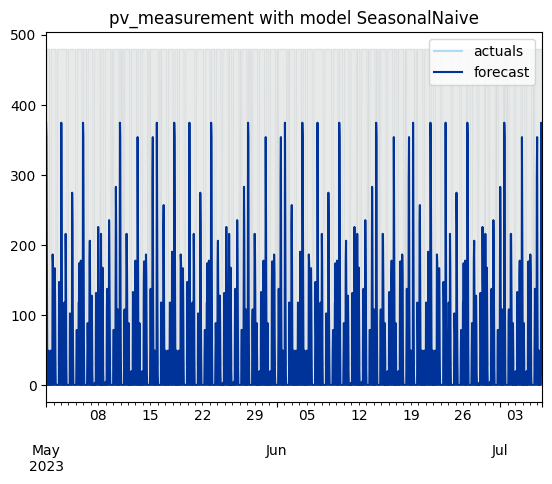

In [41]:
prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0],
                start_date="2023-05-01")

In [42]:
forecasts_df.to_csv(f'precictions_{location}_{version}.csv')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_enforce_model_list', '_nan_tail', '_predict', '_regr_param_check', '_run_template', '_run_validations', 'aggfunc', 'back_forecast', 'best', 'best_model', 'best_model_ensemble', 'best_model_id', 'best_model_name', 'best_model_non_horizontal', 'best_model_params', 'best_model_per_series_mape', 'best_model_per_series_score', 'best_model_transformation_params', 'categorical_transformer', 'constraint', 'current_model_file', 'date_col', 'df_wide_numeric', 'drop_data_older_than_periods', 'drop_most_recent', 'ens_copy', 'ensemble', 'ensemble_check', 'ensemble_templates2', 'export_best_model', 'export_template', 'failure_rate', 'fit', 'fit_data', 'foreca

In [22]:
print(model.model_list)

['ConstantNaive', 'LastValueNaive', 'AverageValueNaive', 'GLS', 'SeasonalNaive', 'SeasonalityMotif']


In [ ]:
model.best_model_name = "SeasonalNaive"
model.best:model_params = "{""method"": ""lastvalue"", ""lag_1"": 7, ""lag_2"": 59}"
model.best_model_transformation_params = "{""fillna"": ""zero"", ""transformations"": {""0"": ""ClipOutliers"", ""1"": ""QuantileTransformer"", ""2"": ""MaxAbsScaler""}, ""transformation_params"": {""0"": {""method"": ""clip"", ""std_threshold"": 3, ""fillna"": null}, ""1"": {""output_distribution"": ""uniform"", ""n_quantiles"": 1000}, ""2"": {}}}"
